<a href="https://colab.research.google.com/github/Trissaan/Heart_Disease_Prediction_Application_using_Random_Forest_Model/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


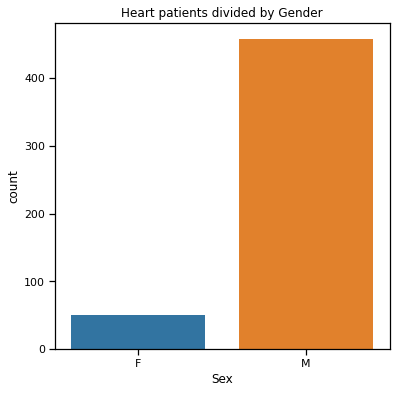

In [ ]:
df = pd.read_csv("/content/heart.csv")
#Dataframe loaded with rows containing details of heart patients
df1 = df[df['HeartDisease']==1]
# First 5 rows of our data
print(df.head())
#EXPLORATORY DATA ANALYSIS
#Gender vs Heart Disease
plt.figure(figsize=(6,6))
sns.set_context('notebook',font_scale = 1)
sns.countplot(df1['Sex'])
plt.title('Heart patients divided by Gender')
plt.show()

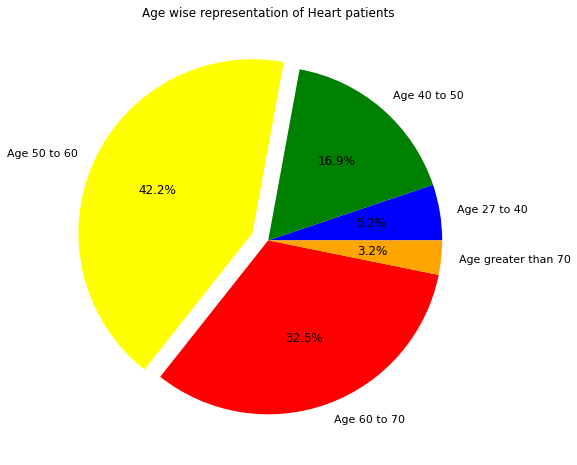

In [ ]:
#Age wise distribution of heart patients
Young = df1[(df1.Age>=28)&(df1.Age<40)]
Middle = df1[(df1.Age>=40)&(df1.Age<50)]
Middle1 = df1[(df1.Age>=50)&(df1.Age<60)]
Elder1 = df1[(df1.Age>=60)&(df1.Age<70)]
Elder = df1[(df1.Age>70)]
colors = ['blue','green','yellow','red','orange']
explode = [0,0,0.1,0,0]
plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale = 1)
plt.pie([len(Young),len(Middle),len(Middle1),len(Elder1),len(Elder)],labels=['Age 27 to 40','Age 40 to 50','Age 50 to 60','Age 60 to 70','Age greater than 70'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age wise representation of Heart patients')
plt.show()

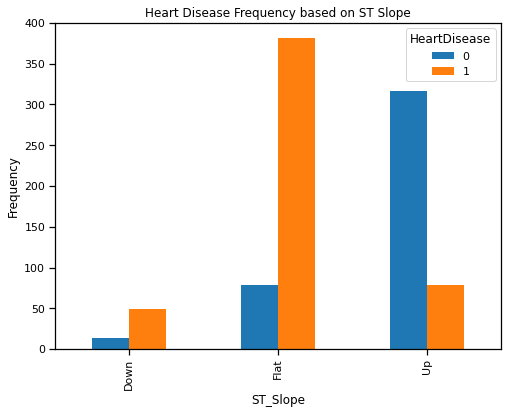

In [ ]:
#ST_SLOPE vs Heart Disease
pd.crosstab(df.ST_Slope,df.HeartDisease).plot(kind="bar",figsize=(8,6))
plt.title('Heart Disease Frequency based on ST Slope')
plt.ylabel('Frequency')
plt.show()

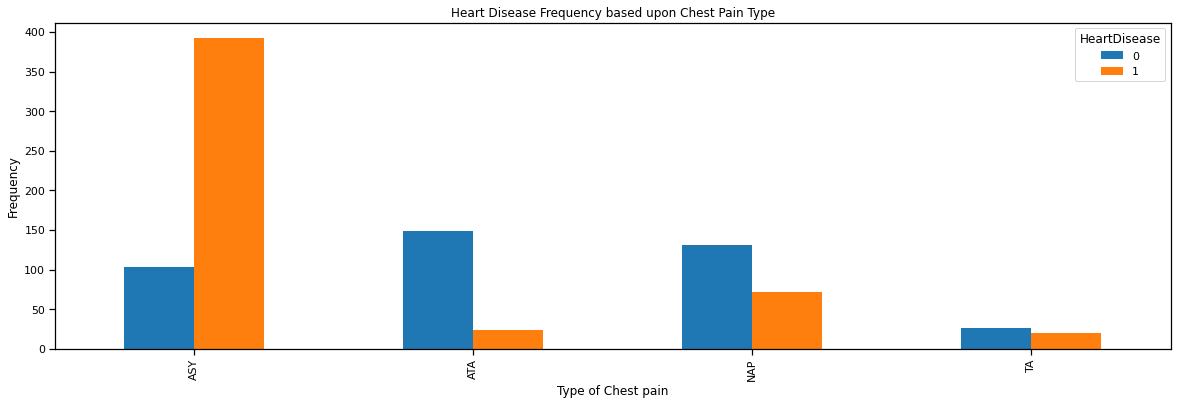

In [ ]:
#Chest pain type vs Heart Disease
pd.crosstab(df.ChestPainType,df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency based upon Chest Pain Type')
plt.xlabel('Type of Chest pain')
plt.ylabel('Frequency')
plt.show()

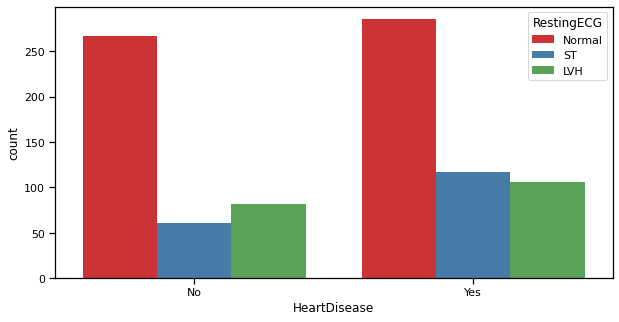

In [ ]:
#Resting ECG Pattern vs Heart disease
plt.figure(figsize=(10,5))
sns.countplot(x=df.HeartDisease,hue=df.RestingECG,palette = "Set1")
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.show()

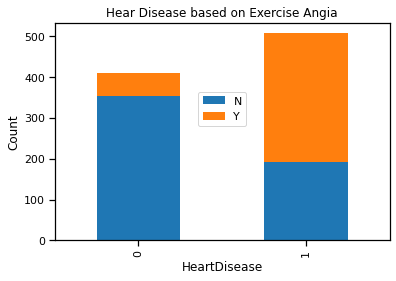

In [ ]:
#Exercise Angia vs Heart Disease
df2 = df.groupby(['HeartDisease', 'ExerciseAngina'])['HeartDisease'].count().unstack('ExerciseAngina').fillna(0)
df2[['N', 'Y']].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(0.5,0.5))
plt.ylabel('Count')
plt.title('Hear Disease based on Exercise Angia')
plt.show()

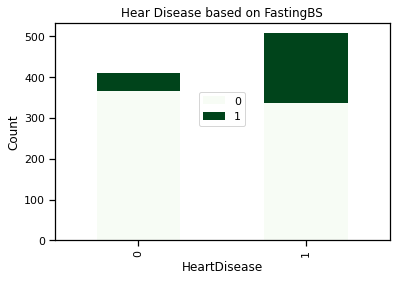

In [ ]:
#FastingBS vs Heart disease
df3 = df.groupby(['HeartDisease', 'FastingBS'])['HeartDisease'].count().unstack('FastingBS').fillna(0)
df3[[0, 1]].plot(kind='bar', stacked=True,colormap='Greens')
plt.legend(bbox_to_anchor=(0.5,0.5))
plt.ylabel('Count')
plt.title('Hear Disease based on FastingBS')
plt.show()

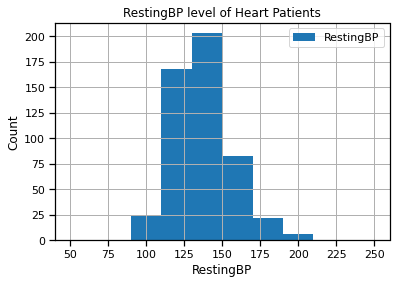

In [ ]:
#Resting BP vs Heart Disease
q = df[df['HeartDisease'] == 1]
p = q['RestingBP']
p.hist(legend= 'true',range=[50,250])
plt.title('RestingBP level of Heart Patients')
plt.xlabel('RestingBP')
plt.ylabel('Count')
plt.show()

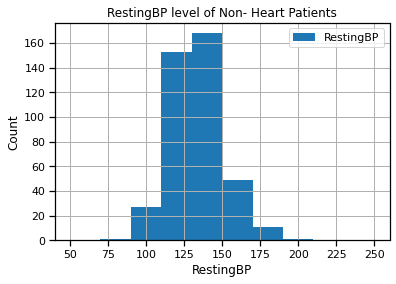

In [ ]:
m = df[df['HeartDisease'] == 0]
n = m['RestingBP']
n.hist(legend= 'true',range=[50,250])
plt.title('RestingBP level of Non- Heart Patients')
plt.xlabel('RestingBP')
plt.ylabel('Count')
plt.show()


In [ ]:
#To find null and duplicate values
print(df.isnull().sum())
dup = df.duplicated().sum()
print(dup)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
0


In [ ]:
#Data pre-processing
df2 = df[df['HeartDisease']==0 ]
df3 = df2[df2['Cholesterol'] > 0]
df4 = df1[df1['Cholesterol']>0]
df5 = df[df['Cholesterol']==0]
df6 = df[df['RestingBP'] == 0]
df7 = df[df['RestingBP']>0]
a = int(df4['Cholesterol'].mean())
b = int(df3['Cholesterol'].mean())
c = int(df6['RestingBP'].count())
d = int(df7['RestingBP'].mean())
print("The number of rows with 0 as entry in cholesterol field is " + str(df5['Cholesterol'].count()))
print("The mean value of cholesterol of CVD patients is " + str(a))
print("The mean value of cholesterol of non CVD patients is " + str(b))
print("The number of rows with 0 as entry in RestingBP field is " + str(c))
print("The mean value of RestingBP is " + str(d))

The number of rows with 0 as entry in cholesterol field is 172
The mean value of cholesterol of CVD patients is 251
The mean value of cholesterol of non CVD patients is 238
The number of rows with 0 as entry in RestingBP field is 1
The mean value of RestingBP is 132


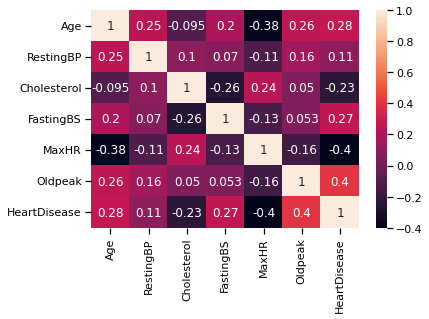

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()